#### 과제0727_2
검색 키워드와 총 필요한 뉴스기사 수를 입력하면 요청한 만큼 데이터프레임 형태(컬럼은 title, url)로 출력해주는 크롤링 프로그램을 수행하세요.

In [1]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query='

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
news_df = pd.DataFrame(columns=['title','url'])
def search(keyword, num):
    title_list = []
    url_list = []
    news_df = pd.DataFrame(columns=['title','url'])
    for i in range(1, num+1, 10):
        url = 'https://search.naver.com/search.naver?where=news&query='+str(keyword)+'&start='+str(i)
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'lxml')
        articles = soup.find_all('a',{'class':{'news_tit'}})
        for article in articles:
            newslink = article['href']
            url_list.append(newslink)
            title = article.text
            title_list.append(title)
    news_df.title = title_list
    news_df.url = url_list
    return news_df.iloc[:num].drop_duplicates(subset=['title', 'url'])



In [2]:
df = search('AI', 100)
df

,title,url
0,"KT·서울성모병원, 당뇨 관리 돕는 AI 기술 개발",https://biz.chosun.com/it-science/ict/2022/08/...
1,"삼성전자, AI인재 키워 반도체·디스플레이 연구한다",https://zdnet.co.kr/view/?no=20220807083406
2,"농정원, 스마트농업 AI 경진대회 개최…총상금 1억원",https://www.yna.co.kr/view/AKR2022080806520000...
3,삼성전자 ‘AI 챌린지’,https://www.chosun.com/economy/tech_it/2022/08...
4,"코트라, 'AI 활용'…중견기업 ESG 모니터링 지원",http://www.edaily.co.kr/news/newspath.asp?news...
...,...,...
95,"한양대 ERICA, CEO를 위한 AI 교육과정 신설",http://www.newsis.com/view/?id=NISX20220805_00...
96,'인공지능(AI) 활용 간담회' 개최,http://www.newsis.com/view/?id=NISI20220804_00...
97,"흥국생명·로완, AI 활용한 치매 예방 프로그램 업무협약 체결",http://www.asiaa.co.kr/news/articleView.html?i...
98,"강기정 광주시장 ""여당이 AI반도체 단지 등 현안 힘써달라""",http://www.newsis.com/view/?id=NISX20220803_00...


In [4]:
keyword = 'AI' 
num = 1000
title_list = []
url_list = []
news_df = pd.DataFrame(columns=['title','url'])
for i in range(1, num+1, 10):
    url = 'https://search.naver.com/search.naver?where=news&query='+str(keyword)+'&start='+str(i)
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'lxml')
    articles = soup.find_all('a',{'class':{'news_tit'}})
    for article in articles:
        newslink = article['href']
        url_list.append(newslink)
        title = article.text
        title_list.append(title)
news_df.title = title_list
news_df.url = url_list

In [5]:
import re
text = re.sub('[^가-힣]+', ' ',str(title_list) )
print(len(text))
text

25317


' 서울성모병원 당뇨 관리 돕는 기술 개발 삼성전자 인재 키워 반도체 디스플레이 연구한다 농정원 스마트농업 경진대회 개최 총상금 억원 삼성전자 챌린지 코트라 활용 중견기업 모니터링 지원 충북도 영재고 카이스트 산하 고교로 설립 추진 네이버 네이버클라우드 충북대병원 활용한 스마트 병원 구축 맞손 정보통신산업진흥원과 분야 인재 양성 나선다 일주일내 범죄 발생 예측 정확도 도입 득될까 공감하는 로 사람다운 로봇 세상 만든다 아마존 로봇 진심 아이로봇 품었다 영남중 대구고 동아리 주최 경진대회 수상 네이버 네이버클라우드 충북대병원 활용한 스마트 병원 구축 맞손 삼성전자 대학 대학원생 대상 삼성 챌린지 개최 벤처에 컨설팅 인재 양성 지원 와 대화 이동통신 모니터링 고독사 예방 팔걷은 지자체들 영진전문대 융합기계계열 로봇관련 학술대회 논문상 수상 현대차 경력 세자릿수 채용 인터뷰 도입 정보통신산업진흥원과 분야 인재 양성 나선다 도매꾹 마켓 최초 상품추천 서비스 서울시 기업 내부서 고급 개발자 인력 양성하도록 지원 지금 들어가고 월까지는 팔아라 가 예언하는 나스닥 남성희 전문대교협회장 전문대 반도체 전공에 년제 허용해야 시대 미래전략 교육 대전환 도로교통공단 빅데이터 기반 위험도로예측 시범서비스 구축 와 영어 말하기 대결 윤선생 말하톤 대회 개최 대구 영진전문대 융합기계계열 학술대회 논문상 수상 시 쓰는 인간에게 던지는 화두는 조선대 프라이버시 보장 기술 공동 개발 동형암호 실용화 기반 마련 조선대 김영식 교수 프라이버시 보장 기술 공동 개발 과기정통부 초일류 전략 내놓는다 활용 제고에 방점 는 죠 과기부 주최 심포지엄 주관사 합류 그룹사 총출동 네오텍 적용한 차세대 보안 서비스 사이트디펜더 출시 조선대 화정중서 여름방학 아카데미 진행 카카오가 찜한 아이돌 뉴스 생방송에서 일냈다 가상인간 열풍 땅개 서 무장 호랑이 로 전투력 초격차로 적 초토화 스토리 와 인재 육성 맞손 똑똑한 은행원 나온다 금융위 가명정보 데이터로 허용 풍선 속 다이아몬드 찾기 중국 쇼핑몰 아수라장 가 

In [24]:
with open('notuse.txt','rt',encoding='UTF8') as f:
    rl = f.readlines()

file = re.sub('[^가-힣]',' ', str(rl))
file = re.sub('\s+',' ', file)
file

' 위해 치매 국내 브레인 삼진 케미칼 운영 경진 자동 체결 화성시 융합 전략 위험 괴산군 속도 규제 활성화 하나은행 인력 모집 경북 회수 기기 인지 심사 스마트 전문가 협력 제공 확대 채택 산업 예방 출시 스타트업 의문 사이클 리카 모델 캐나다 스마트폰 모바일 국민은행 협약 발굴 가격 과정 계약 수상 현대차 시대 맞춤 센터 확보 공공 수입 식품 진단 케이 환경 합격 수주 챗봇 여신 영진전문대 기계 계열 전문 허용 가명 에이 플랫폼 조달청 검사 우수 재사용 에듀윌 대교 연합학습 비서 학술 경력 시범 조선대 마련 실시 농산물 구조 고객 생태계 업무 거대 노인 통신 재활용 코넥티브 응급환자 이글루 사이버 코퍼레이션 시집 대상 컨설팅 대화 상품 대규모 교육과정 플랜 차단 마크 선도 세계 시행 부위 원장 누구 김소영 충무 롯데 보건 시드 탑재 강화 이드 휴먼 당뇨 인터뷰 추천 서울시 개발자 전환 도로 영어 윤선생 코딩 컴퍼니 훈련 가상공간 그림 극단 선택 인형 회의 해결 고도화 에듀 스쿨 설치 에프 가이드 위협 소프트웨어 울릉군 이유 파수 식별 딥노 처럼 발주 카이스트 대학원생 뉴스 시도 예술 한국 성과 포착 컴퓨터 지질 주간 허가 규모 업계 시간 개시 리퍼블릭 질환 멋쟁이 사자 대출 기법 판독 효과 생산 네이버 정확도 세상 대학 지자체 관련 도매꾹 전문대 차세대 사이트 디펜더 격차 은행원 광주시 충북 선봬 수립 연구개발 본부 직원 광주 가치 글로벌 진천 한밤중 착수 사회 제이 태국 상위 단지 강동 경희대 조언 설계 가능 정부 장소 난간 연세대 치료 핵심 박차 하자 문제 세종 충남대 보호 탐지 시아 지역 통해 널리 아이디 충남도 종패 중견 사람 마켓 고급 교통 공단 인간 프라이버시 보장 교수 진행 방향 트윈 프리 등록 유통 드림 호남대 발달장애 등장 모네 아트 캠프 울산 수료식 기보 신입 직전 우리말 신소재 캐릭터 세존 방역 시리즈 동향 획득 여명 특징 간담 강기정 현안 달라 유일 음성 학회 이벤트 경영 구성 가세 제조 수출 금지 환자 초점 통영시 학계 괴산 적극 하

In [25]:
from konlpy.tag import Okt
import pandas as pd
okt = Okt()

stop_words = file, '억원', '기반', '활용', '기술', '금융', '서비스','위원회','그룹','상담', '네이버',
word_token = okt.morphs(str(text))

s = [word for word in word_token if not word in stop_words]
s

['서',
 '울',
 '성',
 '모',
 '병원',
 '당뇨',
 '관리',
 '돕는',
 '개발',
 '삼성',
 '전자',
 '인재',
 '키워',
 '반도체',
 '디스플레이',
 '연구',
 '한',
 '다',
 '농정원',
 '스마트',
 '농업',
 '경진',
 '대회',
 '개최',
 '총',
 '상금',
 '삼성',
 '전자',
 '챌',
 '린지',
 '코트라',
 '중견',
 '기업',
 '모니터링',
 '지원',
 '충북도',
 '영재',
 '고',
 '카이스트',
 '산하',
 '고교',
 '로',
 '설립',
 '추진',
 '클라우드',
 '충북대',
 '병원',
 '한',
 '스마트',
 '병원',
 '구축',
 '맞',
 '손',
 '정보통',
 '신',
 '산업',
 '진흥',
 '원',
 '과',
 '분야',
 '인재',
 '양성',
 '나선다',
 '일주일',
 '내',
 '범죄',
 '발생',
 '예측',
 '정확도',
 '도입',
 '득',
 '될까',
 '공감',
 '하는',
 '로',
 '사람',
 '다운',
 '로봇',
 '세상',
 '만든다',
 '아마존',
 '로봇',
 '진심',
 '아이로봇',
 '품었다',
 '영남',
 '중',
 '대구',
 '고',
 '동아리',
 '주최',
 '경진',
 '대회',
 '수상',
 '클라우드',
 '충북대',
 '병원',
 '한',
 '스마트',
 '병원',
 '구축',
 '맞',
 '손',
 '삼성',
 '전자',
 '대학',
 '대학원생',
 '대상',
 '삼성',
 '챌',
 '린지',
 '개최',
 '벤',
 '처',
 '에',
 '컨설팅',
 '인재',
 '양성',
 '지원',
 '와',
 '대화',
 '이동통신',
 '모니터링',
 '고독사',
 '예방',
 '팔',
 '걷은',
 '지자체',
 '들',
 '영진전문대',
 '융합',
 '기계',
 '계열',
 '로봇',
 '관련',
 '학술',
 '대회',
 '논문',
 '상',
 '수상',
 '현대차',
 '

In [26]:
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(str(s))
noun_list = []
for word, tag in morph:
    if (tag=='Noun')& (len(word)>1):
        noun_list.append(word)
# print(morph)
print(noun_list)

['병원', '당뇨', '관리', '개발', '삼성', '전자', '인재', '반도체', '디스플레이', '연구', '농정원', '스마트', '농업', '경진', '대회', '개최', '상금', '삼성', '전자', '린지', '코트라', '중견', '기업', '모니터링', '지원', '충북도', '영재', '카이스트', '고교', '설립', '추진', '클라우드', '충북대', '병원', '스마트', '병원', '구축', '정보통', '산업', '진흥', '분야', '인재', '양성', '일주일', '범죄', '발생', '예측', '정확도', '도입', '공감', '사람', '다운', '로봇', '세상', '아마존', '로봇', '진심', '아이로봇', '영남', '대구', '동아리', '주최', '경진', '대회', '수상', '클라우드', '충북대', '병원', '스마트', '병원', '구축', '삼성', '전자', '대학', '대학원생', '대상', '삼성', '린지', '개최', '컨설팅', '인재', '양성', '지원', '대화', '이동통신', '모니터링', '고독사', '예방', '지자체', '영진전문대', '융합', '기계', '계열', '로봇', '관련', '학술', '대회', '논문', '수상', '현대차', '경력', '자릿수', '채용', '인터뷰', '도입', '정보통', '산업', '진흥', '분야', '인재', '양성', '도매꾹', '마켓', '최초', '상품', '추천', '서울시', '기업', '내부', '고급', '개발자', '인력', '양성', '지원', '지금', '예언', '나스닥', '남성', '전문', '대교협', '회장', '전문대', '반도체', '전공', '년제', '허용', '시대', '미래', '전략', '교육', '전환', '도로', '교통', '공단', '빅데이터', '위험', '도로', '예측', '시범', '구축', '영어', '대결', '윤선생', '대회', '개최', '대구', '영진전문대', '

In [27]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt

rc('font', family = 'Malgun Gothic') #한글 폰트 설정
count = Counter(noun_list)
data = dict(count.most_common())
print(data)

{'솔루션': 87, '구축': 64, '포스코': 63, '자문': 62, '인재': 61, '데이터': 61, '신설': 61, '도입': 56, '개발': 55, '관리': 54, '삼성': 53, '증권': 53, '개최': 51, '콜봇': 46, '현장': 46, '지능': 45, '교육': 43, '카메라': 43, '인공': 40, '기업': 39, '지원': 37, '양성': 37, '사업': 37, '오픈': 36, '대회': 34, '의료': 34, '시스템': 34, '유치': 33, '로봇': 32, '전자': 31, '반도체': 30, '분야': 30, '연구': 29, '영재': 29, '금융위': 28, '혁신': 28, '프로그램': 27, '뇌출혈': 27, '공동': 25, '디지털': 25, '공급': 25, '신약': 25, '병원': 24, '추진': 24, '빅데이터': 24, '분석': 24, '최초': 23, '육성': 23, '투자': 23, '라이브러리': 23, '린지': 22, '보안': 22, '정보': 22, '영상': 22, '제약': 22, '미래': 21, '보급': 21, '울릉도': 21, '예측': 20, '카카오': 20, '자원': 20, '개선': 20, '학습': 20, '논문': 19, '채용': 19, '적용': 19, '의회': 19, '교육청': 19, '위해': 19, '치매': 19, '국내': 19, '브레인': 19, '삼진': 19, '케미칼': 19, '운영': 18, '경진': 17, '자동': 17, '체결': 17, '화성시': 17, '융합': 16, '전략': 16, '위험': 16, '괴산군': 16, '속도': 16, '규제': 16, '활성화': 16, '하나은행': 16, '인력': 15, '모집': 15, '경북': 15, '회수': 15, '기기': 15, '인지': 15, '심사': 15, '스마트': 14, '전문가': 14, '협력': 14, '

(-0.5, 7999.5, 3999.5, -0.5)

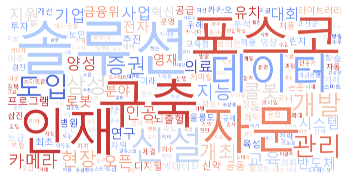

In [29]:
#워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='./malgun.ttf', 
                      background_color = 'white',
                      colormap = 'coolwarm', 
                      width=8000, height=4000,
                      prefer_horizontal = True).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')